<a href="https://colab.research.google.com/github/samikshyasanskruti/MachineLearning-Practice-with-Python/blob/main/6_Predicting_Stock_Prices_with_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Prediction by MLPRegressor(ANN)***

**Load ‘SBI’ stock data by using yfinance**

In [3]:
import yfinance as yf
df = yf.Ticker("SBIN.NS").history(period="max")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,11.881038,12.063962,11.785078,11.965003,43733533,0.0,0.0
1996-01-02 00:00:00+05:30,12.009984,12.054965,11.275291,11.584163,56167280,0.0,0.0
1996-01-03 00:00:00+05:30,11.650134,11.803069,11.215315,11.275290,68296318,0.0,0.0
1996-01-04 00:00:00+05:30,11.125355,11.335266,10.948428,11.236308,86073880,0.0,0.0
1996-01-05 00:00:00+05:30,11.275290,11.305276,11.098363,11.173332,76613039,0.0,0.0


Text(0, 0.5, 'Close Price')

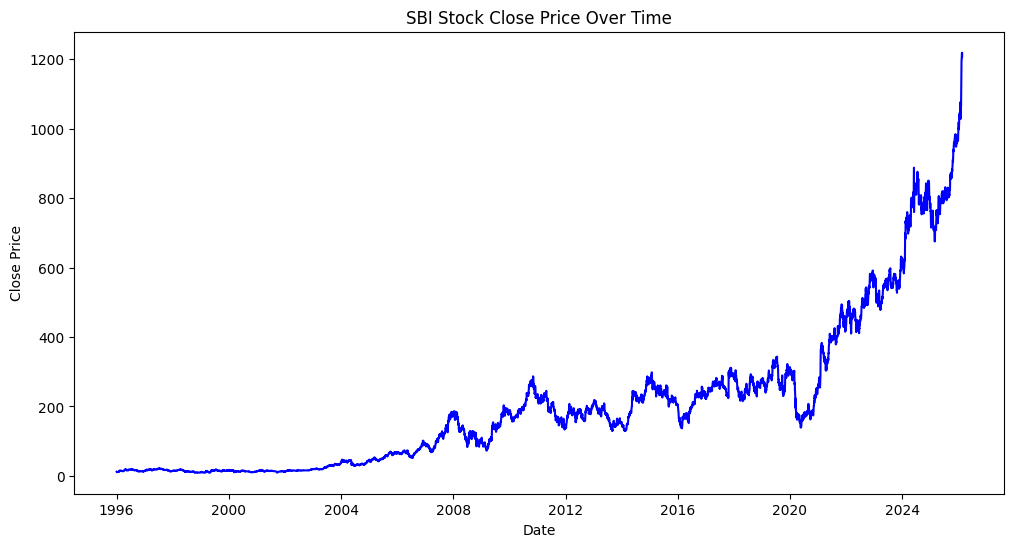

In [4]:
import matplotlib . pyplot as plt
plt.figure ( figsize =(12,6) )
plt.plot (df['Close'] , label ='Close Price ', color ='blue')
plt.title ('SBI Stock Close Price Over Time')
plt.xlabel ('Date')
plt.ylabel ('Close Price')

**Do all necessary feature engineering**

In [5]:
def moving_average_and_ratio_close ( data ) :
    data ['MA_week'] = data['Close']. rolling ( window =5).mean().shift (1)
    data ['MA_month'] = data['Close']. rolling ( window =21) . mean () . shift (1)
    data ['MA_year'] = data['Close']. rolling ( window =252) . mean () . shift (1)
    data ['MA_ratio_week_month'] = data ['MA_week'] / data ['MA_month']
    data ['MA_ratio_week_year'] = data ['MA_week'] / data ['MA_year']
    data ['MA_ratio_month_year'] = data ['MA_month'] / data ['MA_year']
    return data

df_processed = moving_average_and_ratio_close(df.copy())
df_processed.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_week,MA_month,MA_year,MA_ratio_week_month,MA_ratio_week_year,MA_ratio_month_year
Date,,,,,,,,,,,,,
1996-01-01 00:00:00+05:30,11.881038,12.063962,11.785078,11.965003,43733533,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-02 00:00:00+05:30,12.009984,12.054965,11.275291,11.584163,56167280,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03 00:00:00+05:30,11.650134,11.803069,11.215315,11.275290,68296318,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04 00:00:00+05:30,11.125355,11.335266,10.948428,11.236308,86073880,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05 00:00:00+05:30,11.275290,11.305276,11.098363,11.173332,76613039,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


**Removing NaN values**

In [6]:
df_processed.dropna(inplace=True)
df_processed.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_week,MA_month,MA_year,MA_ratio_week_month,MA_ratio_week_year,MA_ratio_month_year
Date,,,,,,,,,,,,,
1996-12-18 00:00:00+05:30,13.363035,13.666740,13.271924,13.347850,163810901,0.0,0.0,12.970036,13.050938,15.328493,0.993801,0.846139,0.851417
1996-12-19 00:00:00+05:30,13.287104,13.423771,13.195992,13.308363,102401023,0.0,0.0,13.021667,13.033873,15.333981,0.999064,0.849203,0.849999
1996-12-20 00:00:00+05:30,13.423771,13.788217,13.423771,13.700143,128921900,0.0,0.0,13.143148,13.034307,15.340823,1.008350,0.856743,0.849648
1996-12-23 00:00:00+05:30,13.788221,13.909702,13.575627,13.660665,114977852,0.0,0.0,13.349668,13.054409,15.350445,1.022618,0.869660,0.850425
1996-12-24 00:00:00+05:30,13.590810,13.782144,13.469327,13.639402,89009162,0.0,0.0,13.428631,13.079428,15.360066,1.026699,0.874256,0.851522


**split into train and test data.**

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (Y)
features = ['MA_week', 'MA_month', 'MA_year', 'MA_ratio_week_month', 'MA_ratio_week_year', 'MA_ratio_month_year']
X = df_processed[features]
Y = df_processed['Close']

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (5852, 6)
Y_train shape: (5852,)
X_test shape: (1463, 6)
Y_test shape: (1463,)


**Build a neural network using MLPRegressor with two hidden layers as 1st hidden layer
containing 16 neurons and 2nd hidden layer containing 8 neurons, ReLU activation, adam
optimizer, early stopping, and print progress message at each iteration of training.**

In [8]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None,
    tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
    n_iter_no_change=10, max_fun=15000)

In [9]:
nn_scikit = MLPRegressor ( hidden_layer_sizes =[16,8] ,
activation = 'relu', solver = 'adam',
learning_rate_init = 0.001, max_iter = 1000,
early_stopping = True , verbose = True , random_state =42)

**Train the model and print MSE**

In [11]:
from sklearn.metrics import mean_squared_error
nn_scikit .fit( X_train , Y_train )
Y_pred = nn_scikit . predict ( X_test )
print ('MSE:', mean_squared_error (Y_test , Y_pred ))

Iteration 1, loss = 35154.85584486
Validation score: -0.140246
Iteration 2, loss = 21833.63348710
Validation score: 0.454269
Iteration 3, loss = 6456.18032084
Validation score: 0.934548
Iteration 4, loss = 645.58620508
Validation score: 0.989837
Iteration 5, loss = 219.71026538
Validation score: 0.990091
Iteration 6, loss = 209.53581674
Validation score: 0.990743
Iteration 7, loss = 200.91570196
Validation score: 0.991021
Iteration 8, loss = 195.38096982
Validation score: 0.991247
Iteration 9, loss = 190.66359578
Validation score: 0.991437
Iteration 10, loss = 186.83399516
Validation score: 0.991585
Iteration 11, loss = 183.50114809
Validation score: 0.991721
Iteration 12, loss = 180.11503394
Validation score: 0.991855
Iteration 13, loss = 175.24248081
Validation score: 0.992157
Iteration 14, loss = 169.15788778
Validation score: 0.992566
Iteration 15, loss = 160.67706762
Validation score: 0.993028
Iteration 16, loss = 146.36125329
Validation score: 0.993791
Iteration 17, loss = 129.01

**Standarize all feature value, and then train the model, predict, and plot actual vs prediction**

In [12]:
from sklearn . preprocessing import StandardScaler
scaler = StandardScaler ()
X_train_scaled = scaler . fit_transform ( X_train )
X_test_scaled = scaler . transform ( X_test )
Y_train_scaled =scaler . fit_transform ( Y_train . values . reshape ( -1,1) )
Y_test_scaled = scaler . transform ( Y_test . values . reshape ( -1,1) )

**Make the prediction into original scale and plot actual vs prediction**

In [13]:
# Scale Y_pred to create Y_pred_scaled
Y_pred_scaled = scaler.transform(Y_pred.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(Y_pred_scaled)

# ***Prediction by Artificial Neural-Networks***

**import the necessary modules and set a random seed, which is recommended for
reproducible modeling:**

In [14]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
tf. random . set_seed (42)


**Create a Keras Sequential model by passing a list of layer instances to the constructor,
including two fully connected hidden layers with 16 nodes and 8 nodes, respectively. And
again, ReLU activation is used:**

In [15]:
model = keras . Sequential ([
keras . layers . Dense (16, activation ='relu' ,
input_shape =( X_train_scaled . shape [1] ,) ) ,
keras . layers . Dense (8, activation ='relu') ,
keras . layers . Dense (1)
# keras . layers . Dense (1 , activation = ’ relu ’) # added ReLU onoutput for non - negative predictions
])

**Compile the model by using Adam as the optimizer**

In [16]:
model . compile ( optimizer ='adam', loss ='mean_squared_error')
# model . compile ( optimizer = keras . optimizers . Adam ( learning_rate= 0.001) , loss = ’ mean_squared_error ’)

**Fit the model**

In [17]:
model .fit( X_train_scaled , Y_train_scaled , epochs =100,batch_size =32, validation_split =0.2, verbose =1)
history = model .fit( X_train_scaled , Y_train_scaled ,epochs =100 , batch_size =32 , validation_split =0.2 ,verbose =1)

Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7378 - val_loss: 0.0993
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0524 - val_loss: 0.0071
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0060 - val_loss: 0.0039
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 8/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 9/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 10/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 11/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 12/100
147/147 ━━━━━━━━━━━━━━━━━━━━

**Fit the model**

In [18]:
Y_pred_tf_scaled = model . predict ( X_test_scaled )

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


**Plot training and validation loss for each epoch.**

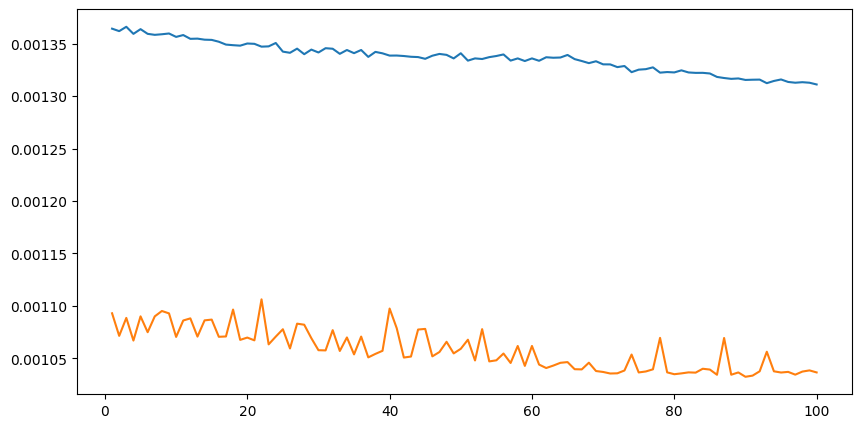

In [20]:
loss = history . history .get ('loss')
val_loss = history . history .get('val_loss')
plt . figure ( figsize =(10, 5) )
epochs = range (1, len ( loss ) + 1)
plt . plot (epochs , loss , label ='Training Loss', color ='C0')
if val_loss is not None :
       plt. plot (epochs , val_loss , label ='Validation Loss',color ='C1')

**Neural network with dropout**

In [21]:
model = keras . Sequential ([
keras . layers . Dense (16, activation ='relu',input_shape =( X_train_scaled . shape [1] ,) ) ,
keras . layers . Dropout (0.2) ,
keras . layers . Dense (8, activation ='relu') ,
keras . layers . Dropout (0.2) ,
keras . layers . Dense (1)
])

**Neural network with early stopping**

In [22]:
model = keras . Sequential ([
keras . layers . Dense (16, activation ='relu',input_shape =( X_train_scaled . shape [1] ,) ) ,
keras . layers . Dropout (0.2) ,
keras . layers . Dense (8, activation ='relu') ,
keras . layers . Dropout (0.2) ,
keras . layers . Dense (1)
])
early_stop = keras . callbacks . EarlyStopping ( monitor ='val_loss',patience =10, restore_best_weights =True , verbose =1)
model . compile ( optimizer = keras . optimizers . Adam ( learning_rate =0.001), loss = 'mean_squared_error')
history = model .fit ( X_train_scaled , Y_train_scaled ,
epochs =200, batch_size =32, validation_split =0.2,
callbacks =[ early_stop ] , verbose =1)

Epoch 1/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.5881 - val_loss: 0.1689
Epoch 2/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3085 - val_loss: 0.0570
Epoch 3/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2040 - val_loss: 0.0465
Epoch 4/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1977 - val_loss: 0.0408
Epoch 5/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1625 - val_loss: 0.0279
Epoch 6/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1472 - val_loss: 0.0338
Epoch 7/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1474 - val_loss: 0.0311
Epoch 8/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1378 - val_loss: 0.0265
Epoch 9/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1309 - val_loss: 0.0349
Epoch 10/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1168 - val_loss: 0.0220
Epoch 11/200
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1104 - val_loss: 0.0328
Epoch 12/200
147/147 ━━━━━━━━━━━━━━━━━━━━